In [62]:
import numpy as np

import pandas as pd
import seaborn as sb

from keras.models import Sequential # Class
from keras.layers import Dense # Class

import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
df = pd.read_csv('./pima.csv',
            names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
print(type(df))
print(df.head(5))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [64]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

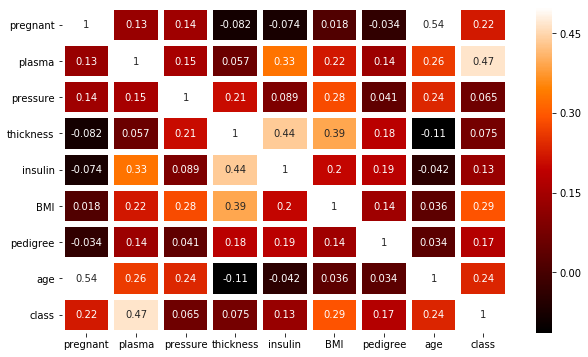

In [65]:
# https://matplotlib.org/users/colormaps.html
colormap = plt.cm.gist_heat   # 그래프의 색상 구성을 정합니다. 열그래프, gist_heat, autumn, cool
plt.figure(figsize=(10,6))      #그래프의 크기를 정합니다.

# df.corr(): 상관관계 분석 데이터
# linewidths=0.1: 상자의 외곽선 두께
# vmax=0.1: 밝기, 0에 가까울수록 밝은 색으로 표시됨.
# cmap=colormap: 적용할 색상값 지정, 기본값 지정,
# linecolor='white': 상자의 외곽선 색깔
# annot=True: Annotation의 약자로 각 셀의 값을 표시할지의 여부 결정
sb.heatmap(df.corr(),linewidths=5,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()  # 챠트 출력

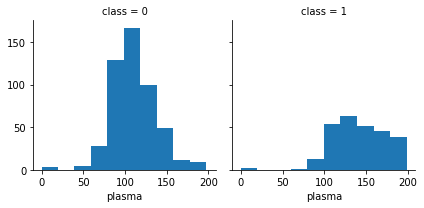

In [66]:
grid = sb.FacetGrid(df, col='class') 
# col: Y축 값, 0 또는 1
# 히스토그램 그래프 출력, plasma: 공복 혈당 농도를 x 좌표로 사용
grid.map(plt.hist, 'plasma', bins=10) 
# 10개 구간으로 분리
plt.show()

In [67]:
# 신규비율 검증데이터와 테스트 데이터 조정

data = np.loadtxt('./pima.csv', delimiter=",")
print('total:', data.shape)
x=data[0:668, 0:8]         # 총 768건중 668 건의 학습 데이터, 668행 8열의 구성
y=data[0:668, 8:]  
print(x.shape)
print(y.shape)

x_val=data[668:718, 0:8]  # 50 건의 검증 데이터, 50행 8열의 구성
y_val=data[668:718, 8:]  
print(x_val.shape)
print(y_val.shape)

# TEST 데이터
x_test=data[718:, 0:8]     # 50 건의 테스트 데이터, 50행 8열의 구성
y_test=data[718:, 8:]  
#print(x_test.shape)
#print(y_test.shape)

total: (768, 9)
(668, 8)
(668, 1)
(50, 8)
(50, 1)


In [21]:
from keras.callbacks import EarlyStopping
from keras import regularizers

# 두개의 은닉층을 사용하는 경우
model = Sequential()
# 입력값 8, 출력 노드 128개, 활성화 함수 : linear
#model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(128, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
# 입력 값: 8, 출력값: 16

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x, y, validation_data = (x_val, y_val), epochs=1000, batch_size=10, callbacks=[early_stopping])

Train on 668 samples, validate on 50 samples
Epoch 1/1000
668/668 [==============================] - 1s 910us/step - loss: 2.0298 - acc: 0.5808 - val_loss: 1.5384 - val_acc: 0.6400
Epoch 2/1000
668/668 [==============================] - 0s 148us/step - loss: 1.5213 - acc: 0.6497 - val_loss: 1.3613 - val_acc: 0.6400
Epoch 3/1000
668/668 [==============================] - 0s 150us/step - loss: 1.3551 - acc: 0.6781 - val_loss: 1.2836 - val_acc: 0.6600
Epoch 4/1000
668/668 [==============================] - 0s 148us/step - loss: 1.2792 - acc: 0.6781 - val_loss: 1.2455 - val_acc: 0.6200
Epoch 5/1000
668/668 [==============================] - 0s 148us/step - loss: 1.2315 - acc: 0.6602 - val_loss: 1.2546 - val_acc: 0.6400
Epoch 6/1000
668/668 [==============================] - 0s 153us/step - loss: 1.1993 - acc: 0.6647 - val_loss: 1.1748 - val_acc: 0.6000
Epoch 7/1000
668/668 [==============================] - 0s 174us/step - loss: 1.1684 - acc: 0.6542 - val_loss: 1.1927 - val_acc: 0.7000
Epo

Epoch 120/1000
668/668 [==============================] - 0s 141us/step - loss: 0.5087 - acc: 0.7784 - val_loss: 0.5769 - val_acc: 0.8200
Epoch 121/1000
668/668 [==============================] - 0s 142us/step - loss: 0.5137 - acc: 0.7620 - val_loss: 0.5780 - val_acc: 0.7600
Epoch 122/1000
668/668 [==============================] - 0s 139us/step - loss: 0.5078 - acc: 0.7754 - val_loss: 0.5568 - val_acc: 0.8400
Epoch 123/1000
668/668 [==============================] - 0s 141us/step - loss: 0.5128 - acc: 0.7650 - val_loss: 0.5793 - val_acc: 0.7800
Epoch 124/1000
668/668 [==============================] - 0s 138us/step - loss: 0.5114 - acc: 0.7829 - val_loss: 0.5852 - val_acc: 0.7800
Epoch 125/1000
668/668 [==============================] - 0s 138us/step - loss: 0.5060 - acc: 0.7635 - val_loss: 0.5482 - val_acc: 0.8000
Epoch 126/1000
668/668 [==============================] - 0s 144us/step - loss: 0.5124 - acc: 0.7710 - val_loss: 0.5564 - val_acc: 0.8000
Epoch 127/1000
668/668 [==========

In [22]:
model.summary() # 가중치 1개 + bias 1개
# 파라메터
# 하이퍼 파라메터 : 학습에 사용되는 파라메터

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 30)                1950      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 11,679
Trainable params: 11,679
Non-trainable params: 0
_________________________________________________________________


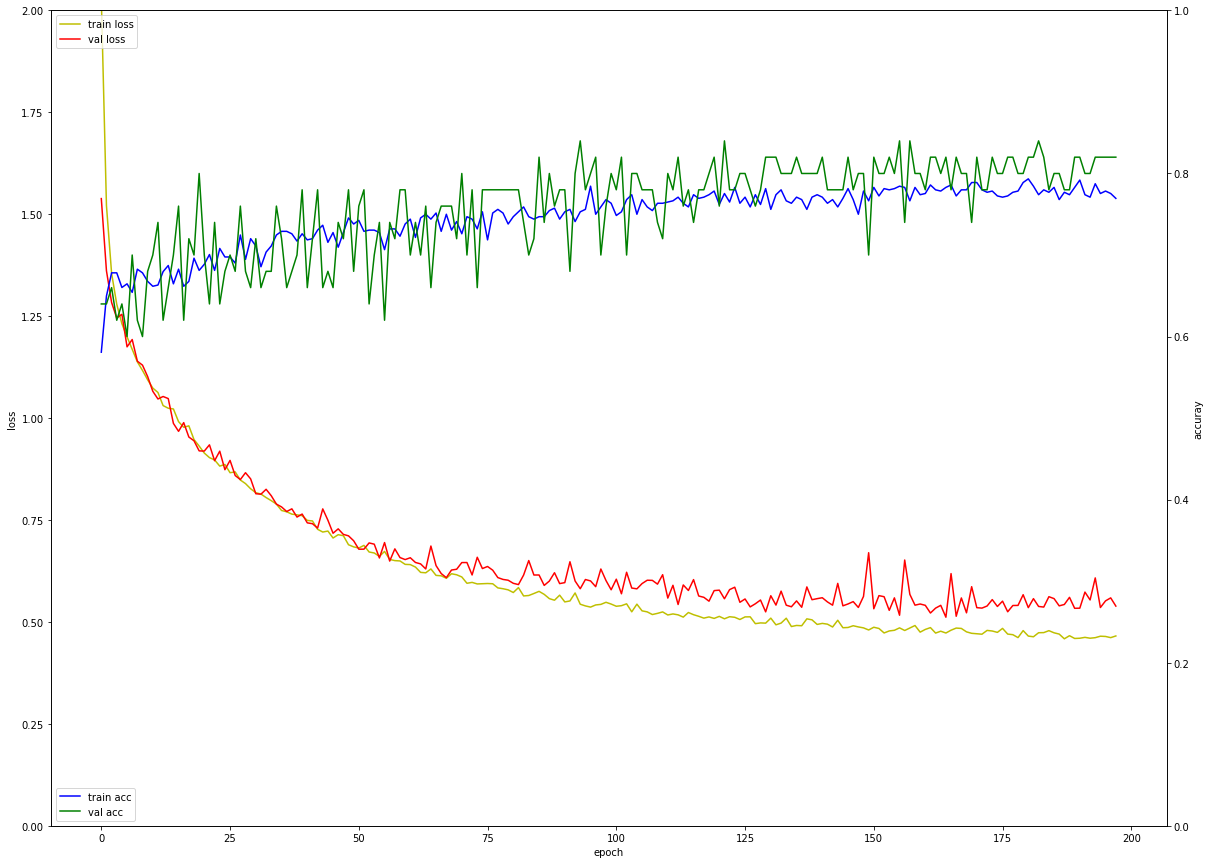

In [24]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 2.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [25]:
test_loss, test_acc = model.evaluate(x_test,y_test, batch_size=10)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

50/50 [==============================] - 0s 220us/step
손실값 :  0.4776251018047333  / 정확도 :  81.99999928474426 %


In [26]:
model.save('./Pima.h5')

In [30]:
from keras.models import load_model # model 사용

model = load_model('./Pima.h5')

In [31]:
print(x_test[0:10])

[[  1.    108.     60.     46.    178.     35.5     0.415  24.   ]
 [  5.     97.     76.     27.      0.     35.6     0.378  52.   ]
 [  4.     83.     86.     19.      0.     29.3     0.317  34.   ]
 [  1.    114.     66.     36.    200.     38.1     0.289  21.   ]
 [  1.    149.     68.     29.    127.     29.3     0.349  42.   ]
 [  5.    117.     86.     30.    105.     39.1     0.251  42.   ]
 [  1.    111.     94.      0.      0.     32.8     0.265  45.   ]
 [  4.    112.     78.     40.      0.     39.4     0.236  38.   ]
 [  1.    116.     78.     29.    180.     36.1     0.496  25.   ]
 [  0.    141.     84.     26.      0.     32.4     0.433  22.   ]]


In [42]:
y_predict = model.predict(x_test[0:10])
print(type(y_predict))
print(y_predict.shape)
print(y_predict)
print(len(x_test[0:10]))
print(y_test[0:10])

<class 'numpy.ndarray'>
(10, 1)
[[0.33859456]
 [0.50491804]
 [0.06926357]
 [0.33218563]
 [0.5936624 ]
 [0.5239782 ]
 [0.23388419]
 [0.47994712]
 [0.13723965]
 [0.3420451 ]]
10
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [58]:
for i in range(len(x_test[0:10])) :
    print('실제값 : {0}, 예측값: {1}'.format(y_test[i],y_predict[i]) , end='')
    if y_predict[i] >= 0.5 :
        print('--> 당뇨')
    else :
        print('--> 해당안됨')

실제값 : [0.], 예측값: [0.33859456]--> 해당안됨
실제값 : [1.], 예측값: [0.50491804]--> 당뇨
실제값 : [0.], 예측값: [0.06926357]--> 해당안됨
실제값 : [0.], 예측값: [0.33218563]--> 해당안됨
실제값 : [1.], 예측값: [0.5936624]--> 당뇨
실제값 : [0.], 예측값: [0.5239782]--> 당뇨
실제값 : [0.], 예측값: [0.23388419]--> 해당안됨
실제값 : [0.], 예측값: [0.47994712]--> 해당안됨
실제값 : [0.], 예측값: [0.13723965]--> 해당안됨
실제값 : [0.], 예측값: [0.3420451]--> 해당안됨


In [51]:
data = "3.,121.,52.,0.,0.,36.,0.127.,25."
data = np.array(data.split(','), dtype=float) # or int
print(type(data))
print(data.shape)
print(data)

ValueError: could not convert string to float: '0.127.'

In [52]:
x = np.array([data,])
print(type(x))
print(x.shape)
print(x)

<class 'numpy.ndarray'>
(1,)
['3.,121.,52.,0.,0.,36.,0.127.,25.']


In [71]:
#yp = model.predict(x)
# for i in range(len(x)) :
#     print('실제값 : {0}, 예측값: {1}'.format(y_test[9],yp[i]) , end='')
#     if yp[i] >= 0.5 :
#         print('--> 당뇨')
#     else :
#         print('--> 해당안됨')


In [82]:
# 신규비율 검증데이터와 테스트 데이터 조정

data = np.loadtxt('./pima.csv', delimiter=",")
print('total:', data.shape)
x=data[0:668, 0:8]         # 총 768건중 668 건의 학습 데이터, 668행 8열의 구성
y=data[0:668, 8:]  
print(x.shape)
print(y.shape)

x_val=data[668:718, 0:8]  # 50 건의 검증 데이터, 50행 8열의 구성
y_val=data[668:718, 8:]  
print(x_val.shape)
print(y_val.shape)

# TEST 데이터
x_test=data[718:, 0:8]     # 50 건의 테스트 데이터, 50행 8열의 구성
y_test=data[718:, 8:]  
#print(x_test.shape)
#print(y_test.shape)

total: (768, 9)
(668, 8)
(668, 1)
(50, 8)
(50, 1)


In [158]:
## 오버핏 제거
# 두개의 은닉층을 사용하는 경우
model = Sequential()
# 입력값 8, 출력 노드 128개, 활성화 함수 : linear
model.add(Dense(128, input_dim=8, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
# 입력 값: 8, 출력값: 16
#model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
#model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=10)

hist = model.fit(x, y, validation_data = (x_val, y_val), epochs=1000, batch_size=10, callbacks=[early_stopping])

Train on 668 samples, validate on 50 samples
Epoch 1/1000
668/668 [==============================] - 2s 3ms/step - loss: 1.5468 - acc: 0.6228 - val_loss: 1.0995 - val_acc: 0.6600
Epoch 2/1000
668/668 [==============================] - 0s 196us/step - loss: 1.1220 - acc: 0.6527 - val_loss: 0.9323 - val_acc: 0.7200
Epoch 3/1000
668/668 [==============================] - 0s 193us/step - loss: 1.0342 - acc: 0.6632 - val_loss: 0.9981 - val_acc: 0.6000
Epoch 4/1000
668/668 [==============================] - 0s 195us/step - loss: 1.0018 - acc: 0.6856 - val_loss: 1.0433 - val_acc: 0.5800
Epoch 5/1000
668/668 [==============================] - 0s 193us/step - loss: 0.9457 - acc: 0.6901 - val_loss: 0.9029 - val_acc: 0.7000
Epoch 6/1000
668/668 [==============================] - 0s 190us/step - loss: 0.9379 - acc: 0.6796 - val_loss: 0.9990 - val_acc: 0.6200
Epoch 7/1000
668/668 [==============================] - 0s 190us/step - loss: 0.9334 - acc: 0.6632 - val_loss: 0.9784 - val_acc: 0.6200
Epoch

Epoch 120/1000
668/668 [==============================] - 0s 186us/step - loss: 0.5636 - acc: 0.7590 - val_loss: 0.6401 - val_acc: 0.7400
Epoch 121/1000
668/668 [==============================] - 0s 181us/step - loss: 0.5612 - acc: 0.7710 - val_loss: 0.6329 - val_acc: 0.7400
Epoch 122/1000
668/668 [==============================] - 0s 178us/step - loss: 0.5758 - acc: 0.7605 - val_loss: 0.6314 - val_acc: 0.6600
Epoch 123/1000
668/668 [==============================] - 0s 177us/step - loss: 0.5651 - acc: 0.7650 - val_loss: 0.5716 - val_acc: 0.7600
Epoch 124/1000
668/668 [==============================] - 0s 184us/step - loss: 0.5660 - acc: 0.7605 - val_loss: 0.5879 - val_acc: 0.8200
Epoch 125/1000
668/668 [==============================] - 0s 178us/step - loss: 0.5644 - acc: 0.7680 - val_loss: 0.6015 - val_acc: 0.7800
Epoch 126/1000
668/668 [==============================] - 0s 184us/step - loss: 0.5560 - acc: 0.7740 - val_loss: 0.6313 - val_acc: 0.7600
Epoch 127/1000
668/668 [==========

In [159]:
model.summary() # 가중치 1개 + bias 1개
# 파라메터
# 하이퍼 파라메터 : 학습에 사용되는 파라메터

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_92 (Dense)             (None, 30)                3870      
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 31        
Total params: 5,053
Trainable params: 5,053
Non-trainable params: 0
_________________________________________________________________


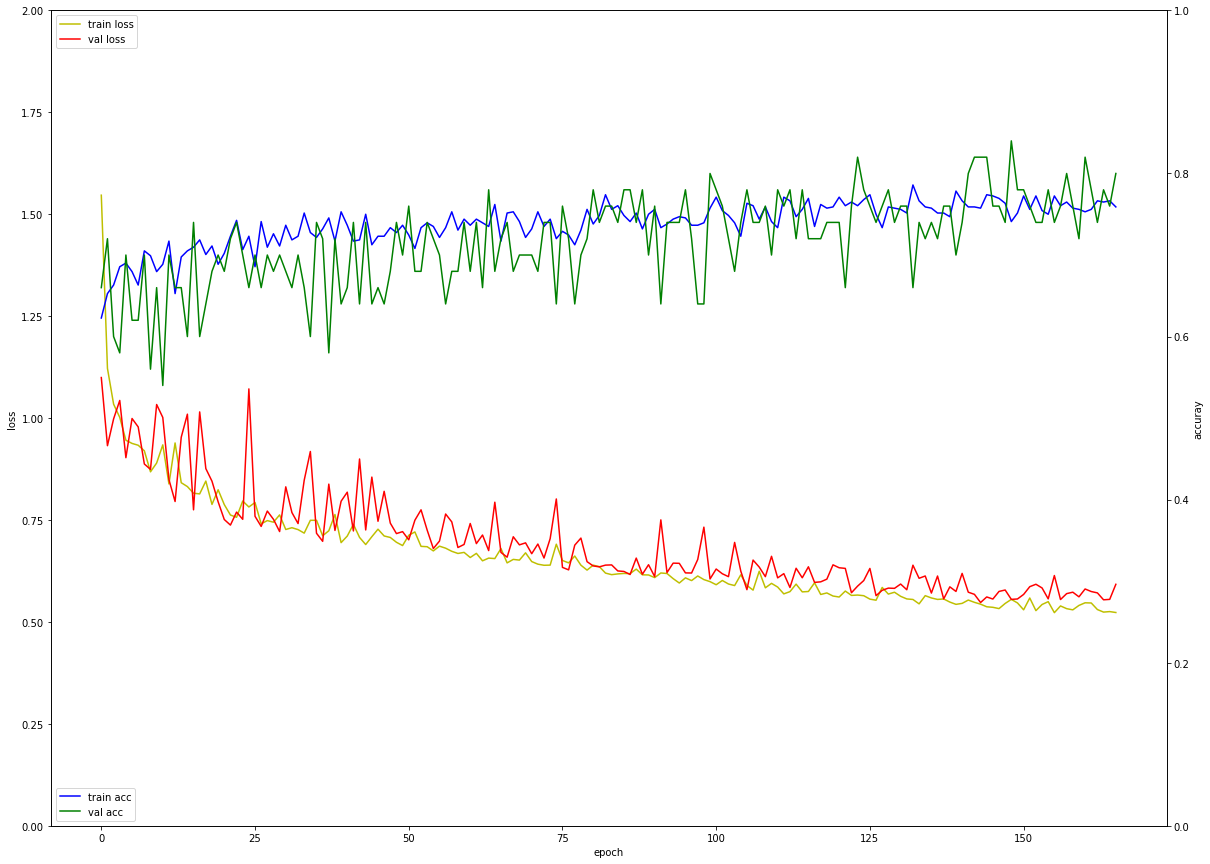

In [160]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
#fig.set_size_inches(10, 5)  # 챠트 크기 설정
fig.set_size_inches(20, 15)  # 챠트 크기 설정 가로*세로

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')  # 훈련 오차
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')  # 검증 오차
#loss_ax.set_xlim([0.0, 100.0]) # 값을 반영하여 변경
loss_ax.set_ylim([0.0, 2.0]) # 값을 반영하여 변경

acc_ax.plot(hist.history['acc'], 'b', label='train acc')  # 훈련 정확도
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')  # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y축

loss_ax.set_xlabel('epoch')  #  x축 레이블
loss_ax.set_ylabel('loss')  #   y축 오차 레이블
acc_ax.set_ylabel('accuray') #   y축 정확도 레이블

loss_ax.legend(loc='upper left')  # 오차레이블 출력 위치
acc_ax.legend(loc='lower left')   # 정확도 레이블 출력 위치

plt.show()

In [161]:
test_loss, test_acc = model.evaluate(x_test,y_test, batch_size=10)
print('손실값 : ', test_loss, ' / 정확도 : ', (test_acc*100), '%')

50/50 [==============================] - 0s 280us/step
손실값 :  0.6641283392906189  / 정확도 :  65.99999964237213 %


In [162]:
model.save('./Pima_overfit.h5')

In [163]:
from keras.models import load_model # model 사용
model = load_model('./Pima_overfit.h5')

In [164]:
for i in range(len(x_test[0:10])) :
    print('실제값 : {0}, 예측값: {1}'.format(y_test[i],y_predict[i]) , end='')
    if y_predict[i] >= 0.5 :
        print('--> 당뇨')
    else :
        print('--> 해당안됨')

실제값 : [0.], 예측값: [0.24083537]--> 해당안됨
실제값 : [1.], 예측값: [0.23060405]--> 해당안됨
실제값 : [0.], 예측값: [0.11030611]--> 해당안됨
실제값 : [0.], 예측값: [0.11639197]--> 해당안됨
실제값 : [1.], 예측값: [0.39995214]--> 해당안됨
실제값 : [0.], 예측값: [0.27906796]--> 해당안됨
실제값 : [0.], 예측값: [0.22287233]--> 해당안됨
실제값 : [0.], 예측값: [0.4636289]--> 해당안됨
실제값 : [0.], 예측값: [0.1057907]--> 해당안됨
실제값 : [0.], 예측값: [0.18892148]--> 해당안됨
